# DSC 530 / Arnold Reyna / Final Project

(referenced functions in this program are Copyright 2016 Allen B. Downey)




In [22]:
from __future__ import print_function, division

%matplotlib inline
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
import numpy as np
import numpy
import pandas as pd
import pandas
import random
import thinkstats2
import thinkplot
import survival
import datetime
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.pyplot
from dateutil.parser import parse


In [23]:
#read data:
df_moon = pd.read_csv("C:\\Users\\15129\\Documents\\GitHub\\ThinkStats2\\code\\datasets_427847_1039424_full_moon.csv")
df_crime = pd.read_csv("C:\\Users\\15129\\Documents\\GitHub\\ThinkStats2\\code\\austin_crime.csv")

df_crime.dropna(subset = ["timestamp"], inplace=True)



**Cleanse data:**

In [24]:
#rename column (removed blanks):
df_crime_n=df_crime.rename(columns={'timestamp':'Time_Date'})
df_moon=df_moon.rename(columns={' Date' :'Dates'})

#convert date/time columns to common date format:
df_moon['Dates'] = pd.to_datetime(df_moon.Dates)
df_crime_n['Dates'] = pd.to_datetime(df_crime_n.Time_Date)
df_moon['Dates'] = df_moon['Dates'].dt.strftime('%Y-%m-%d')
df_moon['Dates'] = pd.to_datetime(df_moon.Dates)

#add moondate "YES" column:
df_moon['full_moon'] = True

# Merging full moon df with crime df:
crime_merged = pd.merge(df_crime_n,df_moon,how='left',on='Dates',validate='many_to_many')

# #creating a scale for crimes (1-5):

Theft1='Theft'
Theft2='Theft: Shoplifting'
Theft3='Theft: All Other Larceny'
Theft4='Theft: Pocket Picking'
Theft5='Theft: Auto Parts'
Theft6='Theft: Coin Op Machine'
Theft_A='Auto Theft'
Theft_A2='Theft: BOV'
Theft_B='Theft: from Building'
Burglary1='Burglary'
Burglary2='Burglary /'
Theft_P='Theft: Purse Snatching'
Agg1='Agg Assault'
Agg2='Aggravated Assault'
Rape='Rape'
Rob='Robbery'
Hom='Homicide: Murder & Nonnegligent Manslaughter'
Mur='Murder'


conditions = [(crime_merged['primary_type'] == Theft1),
              (crime_merged['primary_type'] == Theft2),
              (crime_merged['primary_type'] == Theft3),
              (crime_merged['primary_type'] == Theft4),
              (crime_merged['primary_type'] == Theft5),
              (crime_merged['primary_type'] == Theft6),
              (crime_merged['primary_type'] == Theft_A),
              (crime_merged['primary_type'] == Theft_A2),
              (crime_merged['primary_type'] == Theft_B),
              (crime_merged['primary_type'] == Burglary1),
              (crime_merged['primary_type'] == Burglary2),
              (crime_merged['primary_type'] == Theft_P),
              (crime_merged['primary_type'] == Agg1),
              (crime_merged['primary_type'] == Agg2),
              (crime_merged['primary_type'] == Rape),
              (crime_merged['primary_type'] == Rob),
              (crime_merged['primary_type'] == Hom),
              (crime_merged['primary_type'] == Mur)]

values = [1,2,1,2,1,1,2,1,1,3,3,3,4,4,4,4,5,5]
crime_merged['severity'] = np.select(conditions, values)

# Cleanse "0" from 'severity' column:

crime_merged['severity'] = crime_merged['severity'].replace(0,np.nan)
print ('crime merged severity column (zeros now nan): ',crime_merged.severity.describe())

#create 2 df files with crimes 1) on full moon dates 2)not on full moon dates:
crimes_fullmoon = crime_merged[crime_merged.full_moon == True]
crimes_nonfull = crime_merged[crime_merged.full_moon != True]



crime merged severity column (zeros now nan):  count    73544.000000
mean         1.530132
std          0.967014
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: severity, dtype: float64


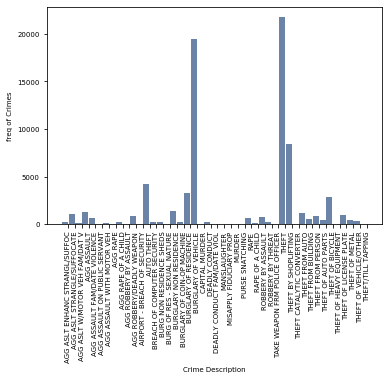

<Figure size 576x432 with 0 Axes>

In [25]:
# Histogram: 
hist= thinkstats2.Hist(crime_merged.description)

font = {'size': 7}

matplotlib.rc('font',**font)
thinkplot.Hist(hist)
plt.xticks(rotation=90)
thinkplot.Show(xlabel='Crime Description',ylabel='freq of Crimes')


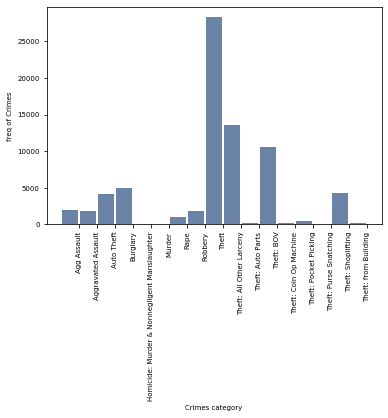

<Figure size 576x432 with 0 Axes>

In [26]:
# GRAPHING HIST: Primary_type :
#width = 0.05
#thinkplot.PrePlot(2)

hist= thinkstats2.Hist(crime_merged.primary_type)

font = {'size': 7}

matplotlib.rc('font',**font)
thinkplot.Hist(hist)
plt.xticks(rotation=90)
thinkplot.Show(xlabel='Crimes category',ylabel='freq of Crimes')




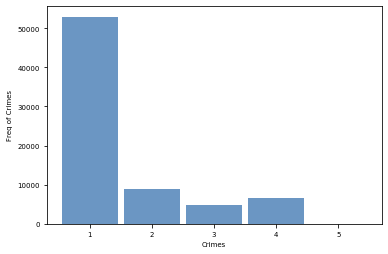

<Figure size 576x432 with 0 Axes>

In [27]:
# GRAPHING HIST: Crime Severity:
width = 0.05
thinkplot.PrePlot(2)
x=crime_merged.severity
hist= thinkstats2.Hist(x)
thinkplot.Hist(hist)
#plt.xticks(rotation=45)
thinkplot.Show(xlabel='Crimes',ylabel='Freq of Crimes')

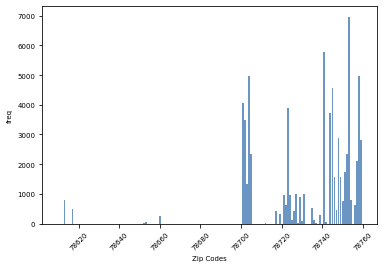

<Figure size 576x432 with 0 Axes>

In [28]:
# GRAPHING HIST: ZIPCODE
width = 0.05
thinkplot.PrePlot(2)
x=crime_merged.zipcode
hist= thinkstats2.Hist(x)
thinkplot.Hist(hist)
plt.xticks(rotation=45)
thinkplot.Show(xlabel='Zip Codes',ylabel='freq')

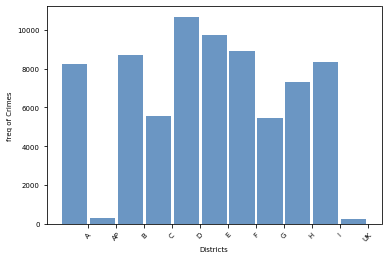

<Figure size 576x432 with 0 Axes>

In [29]:
# GRAPHING HIST:  
width = 0.05
thinkplot.PrePlot(2)
x=crime_merged.district
hist= thinkstats2.Hist(x)
thinkplot.Hist(hist)
plt.xticks(rotation=45)
thinkplot.Show(xlabel='Districts',ylabel='freq of Crimes')

In [30]:
# Create 2 Crime series with crime type column using 2 df: Full moon , non-full moon
type_nonfull=crimes_nonfull.primary_type
type_fullmoon=crimes_fullmoon.primary_type



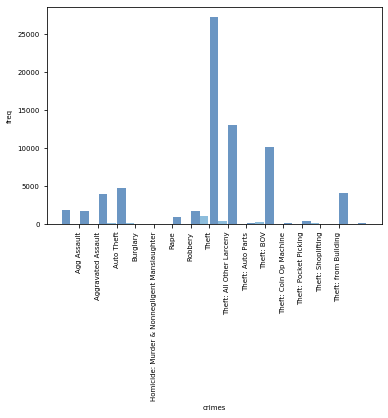

<Figure size 576x432 with 0 Axes>

In [31]:
# GRAPHING HIST : Full Moon vs Non Full Moon:   
width = 0.05
thinkplot.PrePlot(2)
non_hist=thinkstats2.Hist(type_nonfull)
full_hist=thinkstats2.Hist(type_fullmoon)
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(non_hist,align='right',width=width)
thinkplot.Hist(full_hist,align='left',width=width)
plt.xticks(rotation=90)
thinkplot.Show(xlabel='crimes',ylabel='freq')

In [32]:
# Mean : crimes_nonfull vs crimes_full:
print ('crime type mean non full moon : =',crimes_nonfull.severity.mean())
print ('crime type mean full moon : =',crimes_fullmoon.severity.mean())
mean_diff = (crimes_fullmoon.severity.mean()-crimes_nonfull.severity.mean())*100
mean_diff_round = round(mean_diff,5)                 
print ('Difference between Means is :',mean_diff_round,'%')

crime type mean non full moon : = 1.5308250546043825
crime type mean full moon : = 1.511050794881737
Difference between Means is : -1.97743 %


Conclusion: severity scale drops slightly on full moon nights.

In [33]:
# all variables- Mean ():
print ('crime type mean : =',crime_merged.mean())


crime type mean : = council_district_code    5.192724e+00
latitude                 3.029351e+01
longitude               -9.773781e+01
unique_key               1.810203e+10
x_coordinate             3.115753e+06
y_coordinate             1.008020e+07
year                     2.014524e+03
zipcode                  7.873287e+04
full_moon                1.000000e+00
severity                 1.530132e+00
dtype: float64


In [34]:
#Variance : crimes_nonfull vs crimes_full:
print ('crime type Variance non full moon : =',crimes_nonfull.severity.var())
print ('crime type Variance full moon : =',crimes_fullmoon.severity.var())
var_diff = (crimes_fullmoon.severity.var()-crimes_nonfull.severity.var())*100
var_diff_round = round(var_diff,5)                 
print ('Difference between Variance is :',var_diff_round,'%')

crime type Variance non full moon : = 0.9361059155781544
crime type Variance full moon : = 0.9078491281403448
Difference between Variance is : -2.82568 %


Variance difference : 

In [35]:
#Standard Deviation:crimes_nonfull vs crimes_full:
print ('crime type Standard Deviation non full moon : =',crimes_nonfull.severity.std())
print ('crime type Standard Deviation full moon : =',crimes_fullmoon.severity.std())
std_diff = crimes_fullmoon.severity.std()-crimes_nonfull.severity.std()
std_diff_round = round(std_diff,5)
print('difference between Standard Deviation full moon vs non = ',std_diff_round)

crime type Standard Deviation non full moon : = 0.967525666625002
crime type Standard Deviation full moon : = 0.9528111712927934
difference between Standard Deviation full moon vs non =  -0.01471


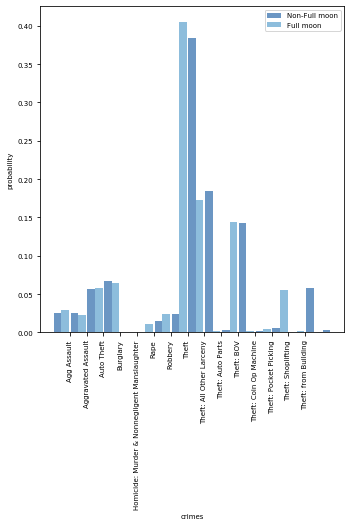

In [36]:
# PMF : comparing probability of crime on Full moon days vs non-full moon days:
pmf_non = thinkstats2.Pmf(crimes_nonfull.primary_type)
pmf_full = thinkstats2.Pmf(crimes_fullmoon.primary_type)
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(pmf_non, align='right', width=width,label='Non-Full moon')
thinkplot.Hist(pmf_full, align='left', width=width,label='Full moon')
plt.xticks(rotation=90)
thinkplot.Config(xlabel='crimes',ylabel='probability')



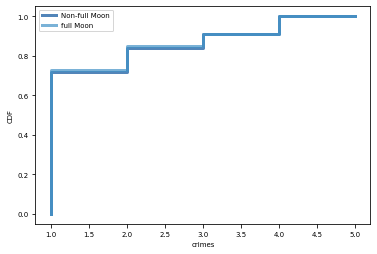

<Figure size 576x432 with 0 Axes>

In [37]:
# CDF of crimes on both: 1) Full moon days, 2) non-full moon days:
cdf_non = thinkstats2.Cdf(crimes_nonfull.severity, label='Non-full Moon')
cdf_full = thinkstats2.Cdf(crimes_fullmoon.severity, label='full Moon')

thinkplot.PrePlot(2)
thinkplot.Cdfs([cdf_non, cdf_full])
thinkplot.Show(xlabel='crimes', ylabel='CDF')




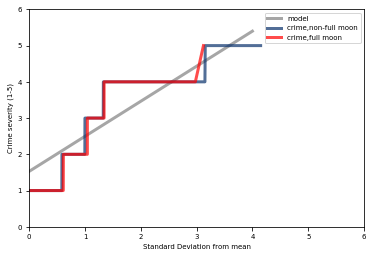

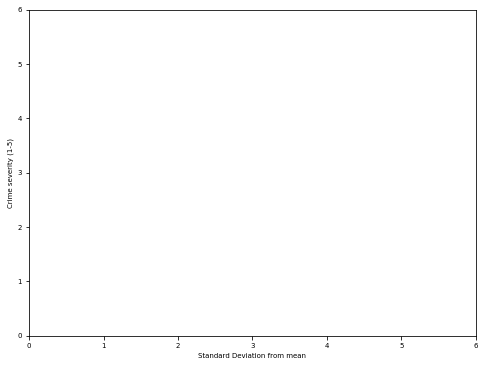

<Figure size 576x432 with 0 Axes>

In [38]:
# Normal Probability Plot -
severity_non = crimes_nonfull.severity.dropna()
severity_moon = crimes_fullmoon.severity.dropna()
crime_merged_all=crime_merged.severity.dropna()


def MakeNormalPlot(severity_non,severity_moon,crime_merged_all):
    mean = crime_merged_all.mean()
    std = crime_merged_all.std()
    xs = [-4,4]
    
    fxs, fys = thinkstats2.FitLine(xs, inter=mean, slope=std)
    thinkplot.Plot(fxs, fys, color='gray', label='model')
    
    xs, ys = thinkstats2.NormalProbability(severity_non)
    thinkplot.Plot(xs, ys, label='crime,non-full moon')
    
    xm,ym, = thinkstats2.NormalProbability(severity_moon)
    thinkplot.Plot(xm,ym,color='red',label='crime,full moon')


MakeNormalPlot(severity_non,severity_moon,crime_merged_all)
thinkplot.Show(xlabel='Standard Deviation from mean',ylabel='Crime severity (1-5)',axis=[0,6,0,6])
thinkplot.Show(xlabel='Standard Deviation from mean',ylabel='Crime severity (1-5)',axis=[0,6,0,6])



Create two scatter plots comparing two variables and provide your analysis on correlation and causation. Remember, covariance, Pearson’s correlation, and NonLinear Relationships should also be considered during your analysis (Chapter 7).
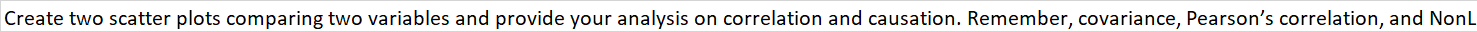

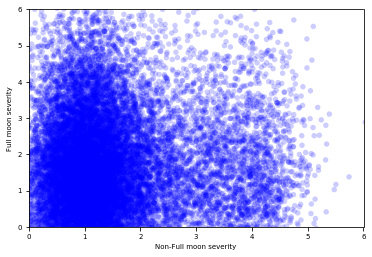

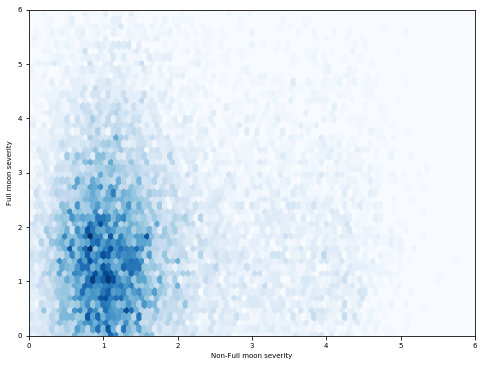

<Figure size 576x432 with 0 Axes>

In [39]:
# Scatter Plot

sev_non_samp = crimes_nonfull['severity'].sample(n=20000, random_state=1,replace=True)
sev_moon_samp = crimes_fullmoon['severity'].sample(n=20000, random_state=1,replace=True)

#severity_non = crimes_nonfull.severity.dropna()
#severity_moon = crimes_fullmoon.severity.dropna()
crime_merged_all = crime_merged.severity.dropna()


#sev_non_samp = severity_non.loc[np.r_[0:50000], :]
#sev_moon_samp = severity_moon.loc[np.r_[0:50000], :]


# need to do scatter- will try taking severity

def Jitter(values, jitter=0.5):
    n = len(values)
    return np.random.uniform(-jitter, +jitter, n) + values

sev_moon_samp = thinkstats2.Jitter(sev_moon_samp, 1.3)
sev_non_samp = thinkstats2.Jitter(sev_non_samp, 0.5)

thinkplot.Scatter(sev_non_samp,sev_moon_samp, alpha=0.2)
thinkplot.Show(xlabel='Non-Full moon severity',ylabel='Full moon severity',axis=[0,6,0,6])


thinkplot.HexBin(sev_non_samp,sev_moon_samp)
thinkplot.Show(xlabel='Non-Full moon severity',ylabel='Full moon severity',axis=[0,6,0,6])



In [40]:
# Chapter 9: Testing a Correlation:

class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys


sev_non_samp_7 = crimes_nonfull['severity'].sample(n=70000, random_state=1,replace=True)
sev_moon_samp_7 = crimes_fullmoon['severity'].sample(n=70000, random_state=1,replace=True)

data = sev_non_samp_7, sev_moon_samp_7
ht = CorrelationPermute(data)
pvalue = ht.PValue()

print ('correlation pvalue = ',pvalue)


correlation pvalue =  0.432


In [41]:
# Chapter 10-11: Logistic regression

crimes_nonfull['severity'] 
crimes_fullmoon['severity']
crime_merged
    
crime_merged['moon'] = (crime_merged.full_moon==True).astype(int)


import statsmodels.formula.api as smf

model = smf.logit(' moon ~ severity ', data=crime_merged)
results = model.fit()
#SummarizeResults(results)
print(results.summary())

endog = pandas.DataFrame(model.endog, columns=[model.endog_names])
exog = pandas.DataFrame(model.exog, columns=model.exog_names)






Optimization terminated successfully.
         Current function value: 0.151931
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   moon   No. Observations:                73544
Model:                          Logit   Df Residuals:                    73542
Method:                           MLE   Df Model:                            1
Date:                Sat, 08 Aug 2020   Pseudo R-squ.:               4.707e-05
Time:                        02:11:58   Log-Likelihood:                -11174.
converged:                       True   LL-Null:                       -11174.
Covariance Type:            nonrobust   LLR p-value:                    0.3051
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.2821      0.038    -87.206      0.000      -3.356      -3.208
severity      -0.0215      0.

Coef of 'Severity'is negative, which indicates Full moon has opposite effect, but is a very small #.
The P-value 0.3 which shows to be greater than .05, so are statistically insignificant.

The coefficient of determination, R2 value for this model is small (.000047), which means that moon doesn’t account for a substantial part of the variation

R2 does not apply to logistic regression, but there are several alternatives.  These values can be useful for comparing models. For example, here’s a model that includes several factors believed to be associated with crimes.


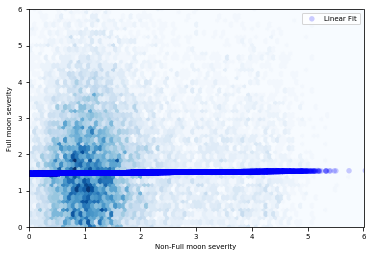

<Figure size 576x432 with 0 Axes>

In [42]:
# another Ch 10 & 11 technique: Linear Least Squares
#Correlation coefficients measure the strength and sign of a relationship, but not the slope. 
#There are several ways to estimate the slope; the most common is a linear least squares fit. 
#A “linear fit” is a line intended to model the relationship between variables. 
#A “least squares” fit is one that minimizes the mean squared error (MSE) between the line and the data.
#Results: this Linear Fit line on scatter plot shows relationship between crimes on Full Moon vs non full moon day. 
#Slope is almost zero, so very small to indicate relationship.

def LeastSquares(xs, ys):
    meanx, varx = MeanVar(xs)
    meany = Mean(ys)

    slope = Cov(xs, ys, meanx, meany) / varx
    inter = meany - slope * meanx

    return inter, slope

def FitLine(xs, inter, slope):
    fit_xs = np.sort(xs)
    fit_ys = inter + slope * fit_xs
    return fit_xs, fit_ys

inter, slope = thinkstats2.LeastSquares(sev_non_samp,sev_moon_samp)
fit_xs, fit_ys = thinkstats2.FitLine(sev_non_samp, inter, slope)


thinkplot.HexBin(sev_non_samp,sev_moon_samp)
thinkplot.Scatter(fit_xs, fit_ys, alpha=0.2,label='Linear Fit')
thinkplot.Show(xlabel='Non-Full moon severity',ylabel='Full moon severity',axis=[0,6,0,6])
